In [1]:
import os, sys
import matplotlib.pyplot as plt
%matplotlib inline 
sys.path.append('/home/jp/projects/python_tools')
import jp_mpl as jplot
sys.path.append('/home/jp/projects/icecube/oscFit_Tania/modules')
import pickle, dataLoader
import numpy as np
from copy import deepcopy
reload(dataLoader)

<module 'dataLoader' from '/home/jp/projects/icecube/oscFit_Tania/modules/dataLoader.pyc'>

In [8]:
data = pickle.load(open('/home/jp/projects/icecube/oscFit_data/tables/GRECO_new/Level7_genie_14585.pckl'))

In [76]:
data = pickle.load(open('/home/jp/projects/icecube/oscFit_data/tables/DRAGON_Tania/nu_mc/Level6.numu.14600.10082016.pckl'))

In [31]:
data = pickle.load(open('/home/jp/projects/icecube/oscFit_data/tables/oscFit_quickstart_data/14550.pckl'))

In [3]:
def expensive_weighted_select(a, w):
    """
    explicitly solve minimisation problem for weighted median

    arguments:
        a : length n array of input values
        w : length n array of weights. must be non-negative
    returns:
        the weighted median (a scalar value)
    """
    import scipy.optimize
    a = np.asarray(a)
    w = np.asarray(w)
    assert np.all(w >= 0.0)

    def f(c):
        return np.sum(w * np.abs(a - c))

    c_0 = np.median(a)
    (c_opt, ) = scipy.optimize.fmin(f, c_0, disp = 0)
    return c_opt


In [44]:
def getEres(data, weight='weight_mu', logE = True):
    reco_energy = data['reco_energy']
    reco_zenith = data['reco_zenith']
    nuzenith    = data['zenith']
    energy      = data['energy']
    weight_nosc = data[weight]
    #true_axis = np.linspace(4, 50, 7) 
    true_axis = 10**np.linspace(0.3, 2.)
    
    eres_axis = np.linspace(-40, 40, 41)

    bin_centres = (eres_axis[1:] + eres_axis[:-1])/2.
    bini = 10
    binf = 30
    bin_centres = bin_centres[bini:binf]
    second_fig = plt.figure(figsize=(7,4))
    if logE:
        plt.ylabel('Fractional error (log[E/GeV])')
        energy_error = (np.log10(reco_energy) - np.log10(energy))/np.log10(energy)
        plt.ylim([0., 0.2])

    else:
        energy_error = (reco_energy - energy)/energy
        plt.ylabel('Fractional error (E)')
        plt.ylim([0., 0.5])


    second_ax = []
    my_eres = np.linspace(-1, 2, 21)

    resolution3 = np.zeros(len(true_axis)-1) 
    myaxis = true_axis[:-1] + (true_axis[1:]-true_axis[:-1])/2.
    for i in range(len(true_axis)-1):
        binbool = (energy > true_axis[i]) & (energy < true_axis[i+1])

        #plt.ylim([0, 0.25])
        #second_ax[-1].text(0.7, 0.07, 
        #                   'E/GeV=[' + "%i" % true_axis[i] + ',' +"%i" % true_axis[i+1] + ']', fontsize = 'large')
        #second_ax[-1].set_yticklabels([])
        #if i < (len(true_axis)-2):
        #    second_ax[-1].set_xticklabels([])
        #if i ==0:
        #    second_ax[-1].set_ylabel('Counts [a.u.]')

        resolution3[i] = expensive_weighted_select(abs(energy_error[binbool]), weight_nosc[binbool]) 
        
    jplot.unfilledBar(true_axis, resolution3)
    plt.xlabel('True neutrino energy (GeV)')
    #second_ax[-1].set_xlabel('(log10(RecoE) - log10(TrueE))/log10(TrueE)')



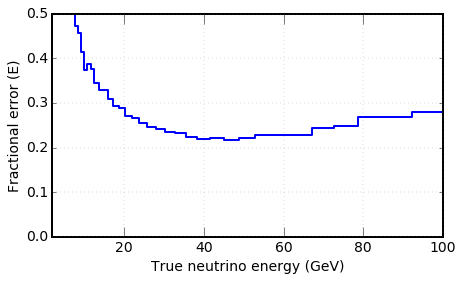

In [45]:
getEres(data, logE=False)

/home/jp/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log10


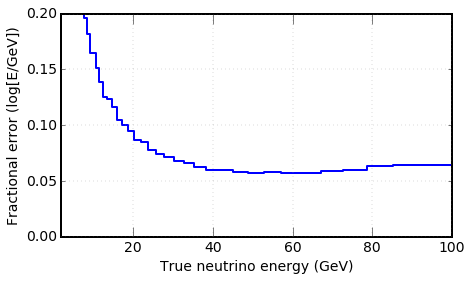

In [46]:
getEres(data)

[-2.     1.     1.301  1.602    inf]
216030
b 0.01 10.00
232715
g 10.00 20.00
180875
r 20.00 40.00
122251
c 40.00 inf


/home/jp/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log10


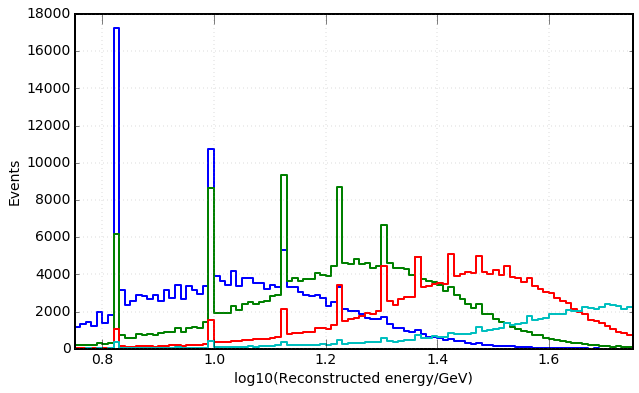

In [72]:
from itertools import cycle
mycolors = cycle(['b','g','r','c','m','y','k'])
cut = data['reco_energy']<10**1.75
plt.figure(figsize=(10,6))
#true_axis = np.linspace(0,3,22)

#true_axis = np.log10(np.array([0.01, 20., 40., np.inf]))
true_axis = np.log10(np.array([0.01, 10., 20., 40., np.inf]))

print true_axis
eaxis = np.linspace(0.75, 1.75, 101)
#eaxis = np.linspace(10**0.75, 10**1.75, 101)

for i in range(len(true_axis)-1):
    true_bool = (data['energy']>= 10**true_axis[i])*(data['energy']<= 10**true_axis[i+1])
    #true_bool = (data['energy']>= true_axis[i])*(data['energy']<= true_axis[i+1])
    print np.sum(true_bool)

    b, x = np.histogram(np.log10(data['reco_energy'][cut*true_bool]), eaxis)
    c = mycolors.next()
    jplot.unfilledBar(x,b, color = c)
    print c, "%.2f" % 10**true_axis[i],"%.2f" %10**true_axis[i+1]

plt.ylabel('Events')
plt.xlabel('log10(Reconstructed energy/GeV)')
#jplot.unfilledBar(x,b2, color='red')                  

In [64]:
10**np.linspace(0.75, 1.75, 9)


array([  5.623,   7.499,  10.   ,  13.335,  17.783,  23.714,  31.623,  42.17 ,  56.234])

[-2.     1.     1.301  1.602    inf]
216030
b 0.01 10.00
232715
g 10.00 20.00
180875
r 20.00 40.00
122251
c 40.00 inf


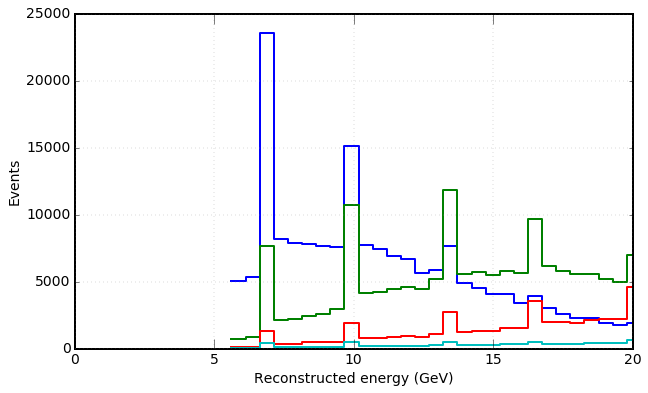

In [73]:
from itertools import cycle
mycolors = cycle(['b','g','r','c','m','y','k'])
cut = data['reco_energy']<10**1.75
plt.figure(figsize=(10,6))
#true_axis = np.linspace(0,3,22)

#true_axis = np.log10(np.array([0.01, 20., 40., np.inf]))
true_axis = np.log10(np.array([0.01, 10., 20., 40., np.inf]))

print true_axis
eaxis = np.linspace(10**0.75, 10**1.75, 101)

for i in range(len(true_axis)-1):
    true_bool = (data['energy']>= 10**true_axis[i])*(data['energy']<= 10**true_axis[i+1])
    #true_bool = (data['energy']>= true_axis[i])*(data['energy']<= true_axis[i+1])
    print np.sum(true_bool)

    b, x = np.histogram(data['reco_energy'][cut*true_bool], eaxis)
    c = mycolors.next()
    jplot.unfilledBar(x,b, color = c)
    print c, "%.2f" % 10**true_axis[i],"%.2f" %10**true_axis[i+1]

#jplot.unfilledBar(x,b2, color='red')                  
plt.xlim(0,20)
plt.ylabel('Events')
plt.xlabel('Reconstructed energy (GeV)')

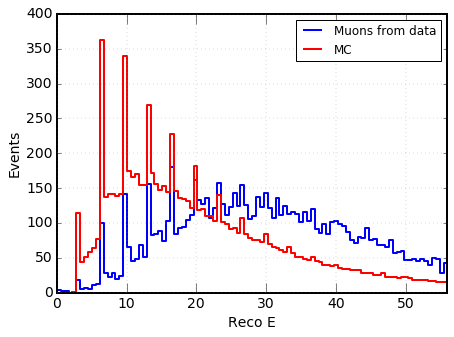

In [81]:
data = pickle.load(open('/home/jp/projects/icecube/oscFit_data/tables/DRAGON_Tania/bkg_data/Level6.0000.data_bkg1.IC86_2.11082016.pckl'))
eaxis = np.linspace(0, 56, 101)
plt.figure(figsize=(7,5))
bins, x = np.histogram(data['reco_energy'], eaxis)
bins2, x = np.histogram(data2['reco_energy'], eaxis)

jplot.unfilledBar(x, bins, color='blue',label='Muons from data')
jplot.unfilledBar(x, bins2*np.sum(bins)/np.sum(bins2), color='red', label='MC')
plt.xlabel('Reco E')
plt.ylabel('Events')
plt.legend(loc=0)

In [54]:
#cut=data['delta_llh']>3.
cut=data['reco_energy']<10**1.75

In [70]:
res_log = (np.log10(data['reco_energy'][cut])-np.log10(data['energy'][cut]))/np.log10(data['energy'][cut])

/home/jp/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


-inf nan


/home/jp/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:101: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


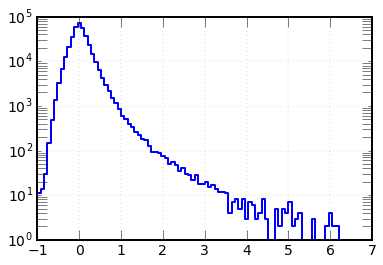

In [71]:
xaxis=np.linspace(-1, 7, 101)
b,x = np.histogram(res_log, xaxis)
jplot.unfilledBar(x, b)
print res_log.mean(),res_log.std()
plt.yscale('log')

(0, 1)

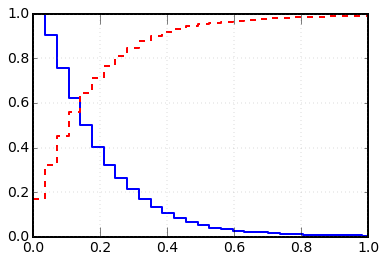

In [72]:
xaxis = np.linspace(0., 7., 201)
b,x = np.histogram(np.abs(res_log), xaxis)
jplot.unfilledBar(xaxis, b*1./b.max())
jplot.unfilledBar(xaxis, np.cumsum(b)*1./np.sum(b), color = 'red',linestyle = '--')
#plt.yscale('log')
plt.xlim([0,1])
#plt.yscale('log')

In [60]:
np.linspace(0.75, 1.75, 9)

array([ 0.75 ,  0.875,  1.   ,  1.125,  1.25 ,  1.375,  1.5  ,  1.625,  1.75 ])

In [ ]:
xaxis